# 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
experiment_data=pd.merge(study_results, mouse_metadata, how = 'left', on ="Mouse ID")


# Display the data table for preview
experiment_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
experiment_data['Mouse ID'].nunique()

249

In [3]:
duplicate_data = experiment_data[experiment_data.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()
duplicate_data

array(['g989'], dtype=object)

In [4]:
clean_study_data_complete = experiment_data[experiment_data['Mouse ID'].isin(duplicate_data)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
clean_study_data_complete['Mouse ID'].nunique()

248

In [6]:
mean_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [7]:
summary_statistics=pd.DataFrame({
    'Mean Tumor Volume':mean_tumor,
    'Median Tumor Volume': median_tumor,
    'Tumor Volume Variance': var_tumor,
    'Tumor Volume Std. Dev.': std_tumor,
    'Tumor Volume Std. Err.': sem_tumor
})

In [8]:
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
time_points_by_drug=clean_study_data_complete.groupby(['Drug Regimen'])['Timepoint'].count()

<AxesSubplot:xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

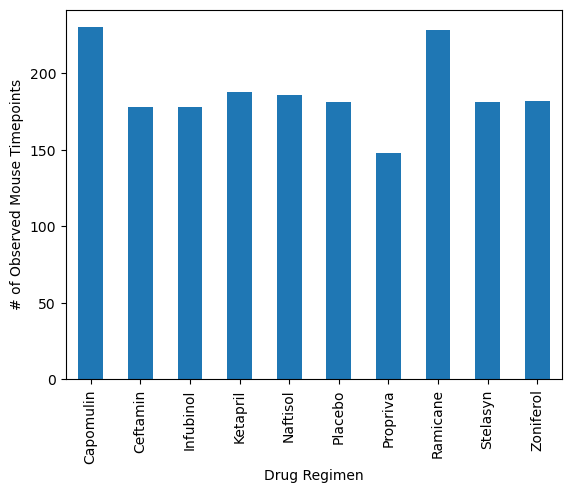

In [10]:
time_points_by_drug.plot(kind='bar',xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

In [11]:
time_points_by_drug_df = time_points_by_drug.reset_index(drop=False).rename(columns={'index':0})
time_points_by_drug_df

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [12]:
x_axis = np.arange(len(time_points_by_drug_df))
tick_locations = [value for value in x_axis]

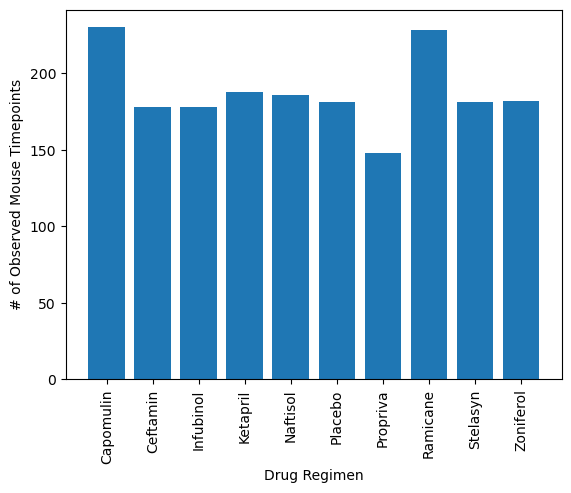

In [13]:
plt.bar(x_axis,time_points_by_drug_df['Timepoint'])
plt.xticks(tick_locations, time_points_by_drug_df["Drug Regimen"], rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()


In [14]:
gender_counts = experiment_data['Sex'].value_counts()
labels = gender_counts.index.tolist()

<AxesSubplot:ylabel='Sex'>

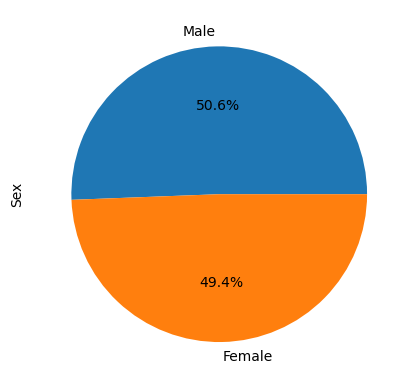

In [15]:
gender_counts.plot(kind='pie', y='Sex', labels=labels, autopct='%1.1f%%')

In [16]:
gender_counts = experiment_data['Sex'].value_counts()
gender_counts

Male      958
Female    935
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff7306bc2e0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

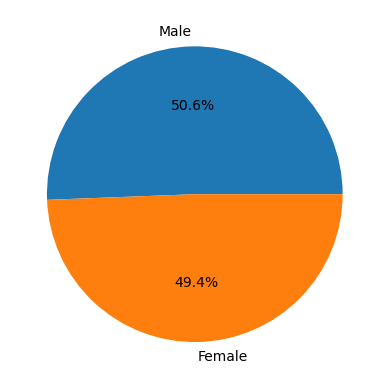

In [17]:
plt.pie(gender_counts, labels=labels,autopct='%1.1f%%')

In [18]:
# Get the last (greatest) timepoint for each mouse
last_timepoint = experiment_data.groupby('Mouse ID')['Timepoint'].max()

# Create a new DataFrame containing only the rows with the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_filtered = experiment_data[experiment_data['Drug Regimen'].isin(treatments)]

# Merge the new DataFrame with the last_timepoint Series to get the tumor volume at the last timepoint for each mouse
merged_df = pd.merge(df_filtered, last_timepoint, on=['Mouse ID', 'Timepoint'])

In [19]:
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [20]:

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for regimen in treatments:
    
    tumor_vol = experiment_data.loc[experiment_data['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(tumor_vol)
    

    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]


In [21]:
quartiles

0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3), dtype: float64

In [22]:
lowerq

47.2084271125

In [23]:
upperq

56.801437570000004

In [24]:
iqr

9.593010457500007

In [25]:
lower_bound

32.81891142624998

In [26]:
upper_bound

71.19095325625001

In [27]:
outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

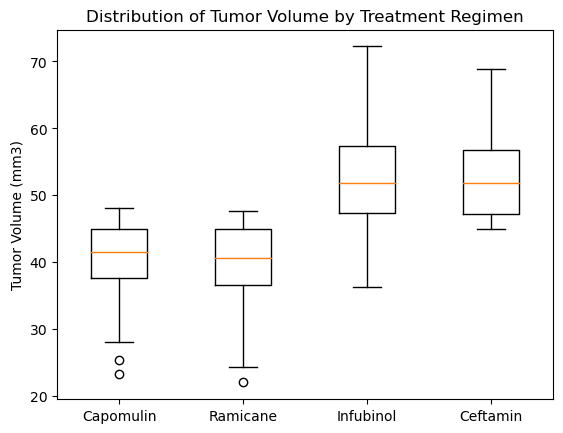

In [28]:
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data)
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Distribution of Tumor Volume by Treatment Regimen')
plt.show()

In [29]:
mouse_data = experiment_data.loc[(experiment_data['Drug Regimen'] == 'Capomulin') & (experiment_data['Mouse ID'] == 's185')]
plot_data = mouse_data[['Timepoint', 'Tumor Volume (mm3)']]

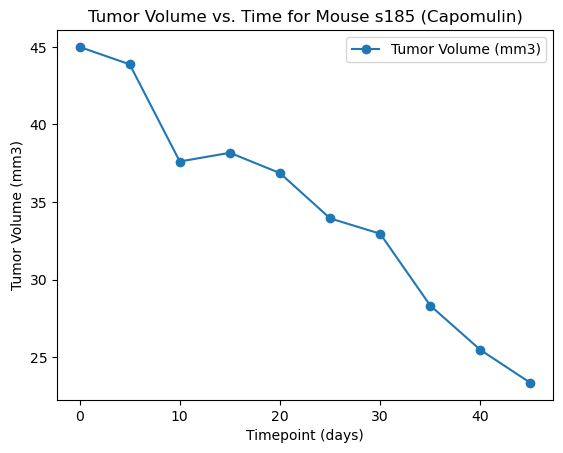

In [30]:
plot_data.plot(x='Timepoint', y='Tumor Volume (mm3)', marker='o')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time for Mouse s185 (Capomulin)')
plt.show()


In [35]:
capomulin_data = experiment_data[experiment_data['Drug Regimen'] == 'Capomulin']

In [36]:
tumor_volume_by_mouse = capomulin_data.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

In [37]:
weight_by_mouse = capomulin_data.groupby('Mouse ID').mean()['Weight (g)']

In [38]:
plot_data = pd.DataFrame({'Weight (g)': weight_by_mouse, 'Average Tumor Volume (mm3)': tumor_volume_by_mouse})

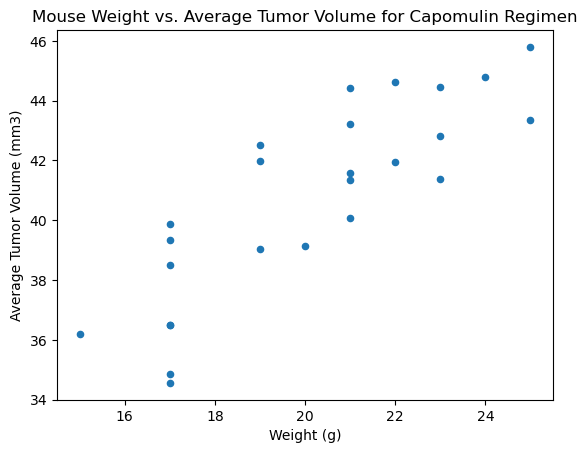

In [39]:
plot_data.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

In [41]:
correlation, p_value = pearsonr(plot_data['Weight (g)'], plot_data['Average Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")
slope, intercept, r_value, p_value, std_err = linregress(plot_data['Weight (g)'], plot_data['Average Tumor Volume (mm3)'])
print(f"Linear regression model: y = {slope:.2f}x + {intercept:.2f}")

# Create the scatter plot with linear regression line
import matplotlib.pyplot as plt
plot_data.plot(kind


SyntaxError: unexpected EOF while parsing (1145815080.py, line 8)